In [25]:
from tensorflow.keras.datasets import mnist

In [74]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

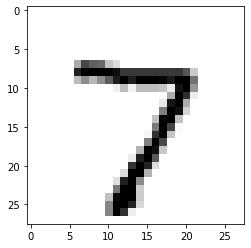

In [49]:
digit = test_images[0]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.imshow()
plt.show()

In [50]:
from tensorflow.keras import models
from tensorflow.keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation="relu", input_shape=(28*28, ), ))
network.add(layers.Dense(10, activation="softmax"))

In [51]:
network.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

In [52]:
train_images = train_images.reshape(60000, 28*28)
train_images = train_images.astype("float32") / 255

test_images = test_images.reshape(10000, 28*28)
test_images = test_images.astype("float32") / 255

In [53]:
from tensorflow.keras.utils import to_categorical
print("before change:", test_labels[0])
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
print("after change:", test_labels[0])

before change: 7
after change: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [54]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 59us/sample - loss: 0.2557 - accuracy: 0.9259
Epoch 2/5
60000/60000 [==============================] - 3s 53us/sample - loss: 0.1026 - accuracy: 0.9694
Epoch 3/5
60000/60000 [==============================] - 3s 53us/sample - loss: 0.0677 - accuracy: 0.9799
Epoch 4/5
60000/60000 [==============================] - 3s 53us/sample - loss: 0.0492 - accuracy: 0.9855
Epoch 5/5
60000/60000 [==============================] - 3s 53us/sample - loss: 0.0371 - accuracy: 0.9887


In [55]:
test_loss, test_acc = network.evaluate(test_images, test_labels, verbose=1)
print("test_acc:", test_acc)

10000/10000 [==============================] - 1s 60us/sample - loss: 0.0685 - accuracy: 0.9794
test_acc: 0.9794


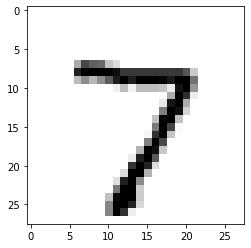

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
number is  7


In [73]:
import numpy as np
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

res = network.predict(test_images)
print(np.around(res[0]))
for i in range(res[0].shape[0]):
    if (res[0][i] >=0.9794):
        print("number is ", i)
        break;